<a href="https://colab.research.google.com/github/maushamkumar/NumPy/blob/main/NumPy_Advance_concept.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy array vs Python lists

In [1]:
import numpy as np

In [2]:
# Speed
# list

import time

a = [i for i in range(10000000)]
b = [i for i in range(10000000, 20000000)]

c = []
start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time() - start)

3.016273021697998


In [4]:
# numpy
a = np.arange(10000000)
b = np.arange(10000000, 20000000)

start = time.time()
c = a + b
print(time.time() - start)


0.03248858451843262


In [6]:
3.016273021697998 / 0.03248858451843262

92.84101066288977

In [7]:
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [8]:
a = np.arange(10000000)
sys.getsizeof(a)

80000112

In [9]:
# use int32
a = np.arange(10000000, dtype=np.int32)
sys.getsizeof(a)

40000112

# Advanced Indexing


In [10]:
a = np.arange(12).reshape(4, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [11]:
a[1, 2]

5

In [12]:
a[1:3, 1:3]

array([[4, 5],
       [7, 8]])

In [13]:
# Fancy index
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [14]:
# First row , thrid row and fourth row
a[[0,2, 3]]


array([[ 0,  1,  2],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [15]:
b = np.arange(24).reshape(6,4)

In [16]:
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [17]:
# First row, third row and fourth row and last row form b
b[[0,2,3, 5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [21]:
# first col, third col and last col form b
b[:, [0, 2, 3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [23]:
# Boolean Indexing
a = np.random.randint(1, 100, 24).reshape(6,4)
a

array([[67, 33, 86, 41],
       [15, 45, 26, 69],
       [21, 17, 78, 72],
       [18, 91, 28, 63],
       [ 2, 36, 94, 31],
       [95, 11, 25, 86]])

In [24]:
# Find all numbers greater than 50
a > 50

array([[ True, False,  True, False],
       [False, False, False,  True],
       [False, False,  True,  True],
       [False,  True, False,  True],
       [False, False,  True, False],
       [ True, False, False,  True]])

This is one the best way to filter your data base on some given condition


In [25]:
a[a>50]

array([67, 86, 69, 78, 72, 91, 63, 94, 95, 86])

In [26]:
# Find out even number in a
a[a%2 == 0]

array([86, 26, 78, 72, 18, 28,  2, 36, 94, 86])

In [29]:
# Find all number greater than 50 and are even
# Whenever we'll work with boolean values we have to use bitwise opration
a[(a>50)&(a%2 == 0)]

array([86, 78, 72, 94, 86])

In [28]:
# Find all numbers not divisible by 7
a [a%7 != 0]

array([67, 33, 86, 41, 15, 45, 26, 69, 17, 78, 72, 18,  2, 36, 94, 31, 95,
       11, 25, 86])

In [30]:
a[~(a%7 == 0)]

array([67, 33, 86, 41, 15, 45, 26, 69, 17, 78, 72, 18,  2, 36, 94, 31, 95,
       11, 25, 86])

# Broadcasting
The term broadcasting describes how NumPy treats arrays with different shapes arithmetic operations.

The smaller array is "broadcast" across the larger array so that they have compatible shapes.

In [32]:
# same shape
a = np.arange(6).reshape(2, 3)
b = np.arange(6,12).reshape(2, 3)

print(a)
print(b)

print(a + b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]
[[ 6  8 10]
 [12 14 16]]


In [33]:
# same shape
a = np.arange(6).reshape(2, 3)
b = np.arange(3).reshape(1, 3)

print(a)
print(b)

print(a + b)
# We are able add with different bcz of broadcasting.

[[0 1 2]
 [3 4 5]]
[[0 1 2]]
[[0 2 4]
 [3 5 7]]


# Broadcasting Rules
## 1. Make the two arrays have the same number of dimensions.
  * If the numbers of dimensions of the two arrays are different(1D, 2D), add new dimensions with size 1 to the head of the array with the smaller dimension.
  (3, 2) and (3) -> then add (1, 3)
  (3, 3, 3) and (3,) -> then add (1, 1, 3)

## 2. Make each dimension of the two arrays the same size.
  * If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.

  (3, 3) and (3,) -> (1, 3) internally it became (3, 3)
  (4, 3) and (3) -> (1,3) and we have to stretch it to (4, 3) internally it became (4, 3)
  
  * If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcast, and an error is raised.

In [34]:
# More examples

a = np.arange(12).reshape(4, 3)  # 2D
b = np.arange(3).reshape(3) # 1D after stretching it will become (1, 3) -> (2, 3) -> (3, 3) -> (4, 3 )

print(a)
print(b)

print(a + b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [35]:
a = np.arange(12).reshape(3, 4) # 2D
b = np.arange(3).reshape(3) # 1D after stretching it will become (3, 3 ) but not (3, 4) so, it will through an error

print(a)
print(b)

print(a + b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [36]:
#
a = np.arange(3).reshape(1, 3) # -> (2, 3) -> (3, 3) -> (4, 3)
b = np.arange(4).reshape(4,1) # -> (4, 2) -> (4, 3)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [38]:
a = np.array([1]) #  -> (1, 1) -> (2, 1) -> (2, 2)
# shape -> (1, 1)
b = np.arange(4).reshape(2, 2)
# shape -> (2, 2 )

print(a)
print(b)

print(a + b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [39]:
a = np.arange(12).reshape(3, 4) # 1 toh h hi nahi to increase kase karoge
b = np.arange(12).reshape(4, 3)  # 1 toh h hi nahi to increase kase karoge

print(a)
print(b)

print(a + b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [40]:
a = np.arange(16).reshape(4, 4)
b = np.arange(4).reshape(2, 2)

print(a)
print(b)

print(a + b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

# Working with mathematical formulas

In [42]:
a = np.arange(10)
np.sum(a)

45

In [43]:
# Sigmoid
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [45]:
# Mean square error
def mean_square_error(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

actual = np.random.randint(1, 50, 25)
predicted = np.random.randint(1, 50, 25)
mean_square_error(actual, predicted)

308.8

In [46]:
# Categorical cross entropy
def categorical_cross_entropy(y_true, y_pred):
  return -np.mean(y_true * np.log(y_pred) + (1-y_true) * np.log(1-y_pred))


# Working with missing values

In [47]:
# Working with missing value -> np.nan
a = np.array([1, 2, 3, 4, np.nan, 6, 7, np.nan, 9])
a

array([ 1.,  2.,  3.,  4., nan,  6.,  7., nan,  9.])

In [48]:
a [~np.isnan(a)]

array([1., 2., 3., 4., 6., 7., 9.])

# Plotting Graphs

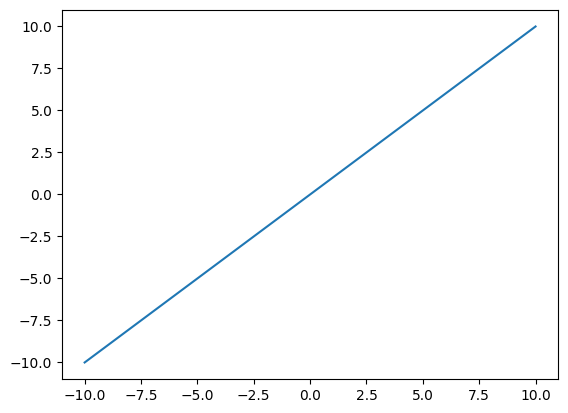

In [50]:
import matplotlib.pyplot as plt
# Plotting a 2D plot
# x = y

x = np.linspace(-10, 10, 100)
y = x

plt.plot(x, y)

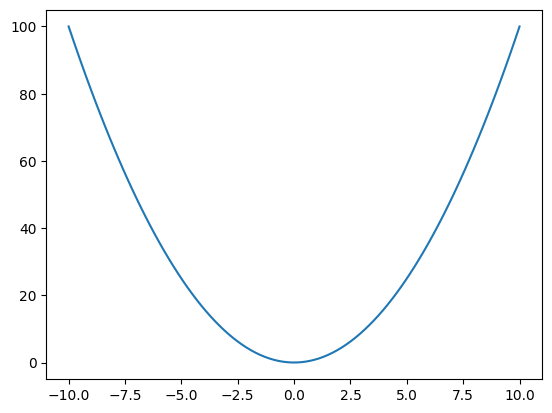

In [51]:
# y = x^2
x = np.linspace(-10, 10, 100)
y = x**2

plt.plot(x, y)

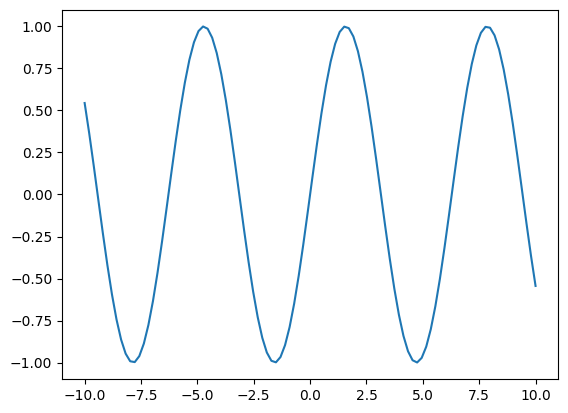

In [52]:
# y = sin(x)
x = np.linspace(-10, 10, 100)
y = np.sin(x)

plt.plot(x, y)

<ipython-input-53-ce307c286614>:3: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


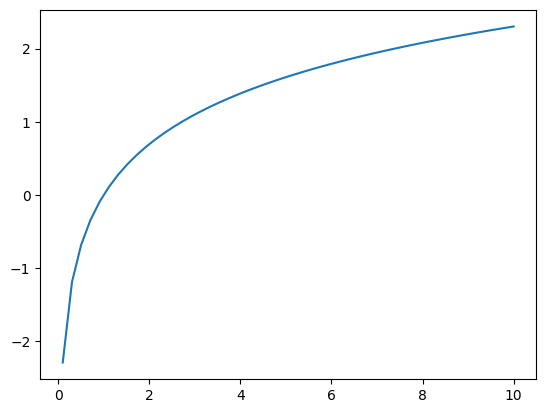

In [53]:
# y = log(x)
x = np.linspace(-10, 10, 100)
y = np.log(x)

plt.plot(x, y)